In [1]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [2]:
from keras import preprocessing
import numpy as np
import keras

# Przygotowanie danych
image_X_train = np.array(X_train)
image_X_test = np.array(X_test)

scaled_X_train = image_X_train.astype('float32') / 255.0
scaled_X_test = image_X_test.astype('float32') / 255.0

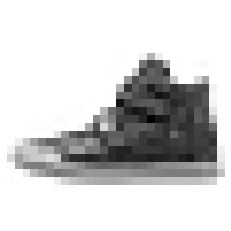

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[142], cmap="binary")
plt.axis('off')
plt.show()

In [4]:
class_names = ["koszulka", "spodnie", "pulower", "sukienka", "kurtka",
"sandał", "koszula", "but", "torba", "kozak"]
class_names[y_train[142]]

'but'

In [5]:
model = tf.keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300))
model.add(keras.layers.Dense(100))
model.add(keras.layers.Dense(10, activation="softmax"))

In [6]:
y_train.shape

(60000,)

In [7]:
model.summary()
tf.keras.utils.plot_model(model, "fashion_mnist.png", show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [8]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [9]:
tb_callback = tf.keras.callbacks.TensorBoard('./image_logs', update_freq=1)

In [10]:
history = model.fit(scaled_X_train, y_train, epochs=20, validation_split=0.2, callbacks=[tb_callback])

Epoch 1/20
1500/1500 [==============================] - 12s 7ms/step - loss: 0.6442 - accuracy: 0.7789 - val_loss: 0.5207 - val_accuracy: 0.8142
Epoch 2/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4883 - accuracy: 0.8313 - val_loss: 0.4790 - val_accuracy: 0.8321
Epoch 3/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4605 - accuracy: 0.8400 - val_loss: 0.4601 - val_accuracy: 0.8401
Epoch 4/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4439 - accuracy: 0.8473 - val_loss: 0.4561 - val_accuracy: 0.8391
Epoch 5/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.4336 - accuracy: 0.8499 - val_loss: 0.4341 - val_accuracy: 0.8482
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4259 - accuracy: 0.8526 - val_loss: 0.4365 - val_accuracy: 0.8460
Epoch 7/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4215 - accuracy: 0.8543 - val_loss: 0.4351 - val_ac

1/1 [==============================] - 0s 251ms/step
Prediction: sandał
Confidence: 1.0
Truth: sandał


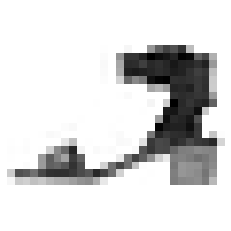

In [11]:
image_index = np.random.randint(len(X_test))
image = np.array([X_test[image_index]])
confidences = model.predict(image)
confidence = np.max(confidences[0])
prediction = np.argmax(confidences[0])
print("Prediction:", class_names[prediction])
print("Confidence:", confidence)
print("Truth:", class_names[y_test[image_index]])
plt.imshow(image[0], cmap="binary")
plt.axis('off')
plt.show()

In [12]:
%load_ext tensorboard
%tensorboard --logdir ./image_logs

Reusing TensorBoard on port 6006 (pid 20924), started 22:11:49 ago. (Use '!kill 20924' to kill it.)

In [13]:
model.save("fashion_clf.h5")

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

In [15]:
X_train_hous, X_test_hous, y_train_hous, y_test_hous = train_test_split(housing['data'], housing['target'], test_size=0.2, random_state=1)

X_train_hous, X_val_hous, y_train_hous, y_val_hous = train_test_split(X_train_hous, y_train_hous, test_size=0.2, random_state=1)
X_train_hous[0]

array([   8.1111    ,   13.        ,    7.94672131,    1.01229508,
        928.        ,    3.80327869,   33.71      , -117.77      ])

In [16]:
scaler = StandardScaler()
X_train_hous = scaler.fit_transform(X_train_hous)
X_val_hous = scaler.transform(X_val_hous)
X_test_hous = scaler.transform(X_test_hous)

X_train_hous = X_train_hous.astype('float32') / 255.0
X_val_hous = X_val_hous.astype('float32') / 255.0
X_test_hous = X_test_hous.astype('float32') / 255.0

X_train_hous[0]

array([ 0.00880023, -0.00487753,  0.00361546, -0.00065922, -0.0017228 ,
        0.00021274, -0.00352053,  0.00352439], dtype=float32)

In [17]:
model_housing = tf.keras.Sequential()
model_housing.add(keras.layers.Dense(30))
model_housing.add(keras.layers.Dense(1))

In [18]:
model_housing.compile(optimizer='SGD', loss=tf.keras.losses.MeanSquaredError())

In [19]:
hs1_callback = tf.keras.callbacks.TensorBoard('./housing_logs', update_freq=1)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.01, verbose=1)

In [20]:
history_hs = model_housing.fit(X_train_hous, y_train_hous, epochs=20, validation_data=[X_val_hous, y_val_hous], callbacks=[hs1_callback,callback])

Epoch 1/20
413/413 [==============================] - 3s 6ms/step - loss: 1.4374 - val_loss: 1.3132
Epoch 2/20
413/413 [==============================] - 2s 4ms/step - loss: 1.3423 - val_loss: 1.3113
Epoch 3/20
413/413 [==============================] - 2s 4ms/step - loss: 1.3417 - val_loss: 1.3114
Epoch 4/20
413/413 [==============================] - 2s 4ms/step - loss: 1.3400 - val_loss: 1.3102
Epoch 5/20
413/413 [==============================] - 2s 4ms/step - loss: 1.3405 - val_loss: 1.3105
Epoch 6/20
413/413 [==============================] - 2s 4ms/step - loss: 1.3396 - val_loss: 1.3086
Epoch 7/20
413/413 [==============================] - 2s 4ms/step - loss: 1.3388 - val_loss: 1.3092
Epoch 7: early stopping


In [21]:
%load_ext tensorboard
%tensorboard --logdir ./housing_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 21244), started 21:47:51 ago. (Use '!kill 21244' to kill it.)

In [22]:
model_housing.save("reg_housing_1.h5")

In [23]:
model_housing_2 = tf.keras.Sequential()
model_housing_2.add(keras.layers.Dense(60))
model_housing_2.add(keras.layers.Dense(1))

model_housing_2.compile(optimizer='SGD', loss=tf.keras.losses.MeanSquaredError())

hs2_callback = tf.keras.callbacks.TensorBoard('./housing_logs/housing2_logs', update_freq=1)
callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.01, verbose=1)

history_hs2 = model_housing_2.fit(X_train_hous, y_train_hous, epochs=20, validation_data=[X_val_hous, y_val_hous], callbacks=[hs2_callback,callback2])
model_housing_2.save("reg_housing_2.h5")

Epoch 1/20
413/413 [==============================] - 3s 5ms/step - loss: 1.4252 - val_loss: 1.3181
Epoch 2/20
413/413 [==============================] - 2s 4ms/step - loss: 1.3474 - val_loss: 1.3161
Epoch 3/20
413/413 [==============================] - 2s 4ms/step - loss: 1.3471 - val_loss: 1.3152
Epoch 4/20
413/413 [==============================] - 2s 4ms/step - loss: 1.3456 - val_loss: 1.3231
Epoch 5/20
413/413 [==============================] - 2s 4ms/step - loss: 1.3443 - val_loss: 1.3143
Epoch 6/20
413/413 [==============================] - 2s 4ms/step - loss: 1.3435 - val_loss: 1.3150
Epoch 7/20
413/413 [==============================] - 2s 4ms/step - loss: 1.3435 - val_loss: 1.3139
Epoch 7: early stopping


In [24]:
model_housing_3 = tf.keras.Sequential()
model_housing_3.add(keras.layers.Dense(20))
model_housing_3.add(keras.layers.Dense(20))
model_housing_3.add(keras.layers.Dense(1))

model_housing_3.compile(optimizer='SGD', loss=tf.keras.losses.MeanSquaredError())

hs3_callback = tf.keras.callbacks.TensorBoard('./housing_logs/housing3_logs', update_freq=1)
callback3 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.01, verbose=1)

history_hs3 = model_housing_3.fit(X_train_hous, y_train_hous, epochs=20, validation_data=[X_val_hous, y_val_hous], callbacks=[hs3_callback,callback3])
model_housing_3.save("reg_housing_3.h5")

Epoch 1/20
413/413 [==============================] - 3s 5ms/step - loss: 1.3960 - val_loss: 1.3178
Epoch 2/20
413/413 [==============================] - 2s 4ms/step - loss: 1.3431 - val_loss: 1.3102
Epoch 3/20
413/413 [==============================] - 2s 4ms/step - loss: 1.3420 - val_loss: 1.3137
Epoch 4/20
413/413 [==============================] - 2s 4ms/step - loss: 1.3410 - val_loss: 1.3082
Epoch 5/20
413/413 [==============================] - 2s 4ms/step - loss: 1.3401 - val_loss: 1.3065
Epoch 6/20
413/413 [==============================] - 2s 4ms/step - loss: 1.3392 - val_loss: 1.3072
Epoch 7/20
413/413 [==============================] - 2s 4ms/step - loss: 1.3356 - val_loss: 1.3033
Epoch 7: early stopping
